In [238]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import random

In [239]:
img = cv2.imread('hypo.png', 0)
img_colorida = cv2.imread('hypo.png')
global height
global width
height, width = img.shape[:2]
(thresh, blackAndWhiteImage) = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

In [240]:
ponto = 100
for i in range(575):
    blackAndWhiteImage[random.randint(0,height-1) ,random.randint(0,width-1)]=ponto
    
cv2.imwrite("result.png",blackAndWhiteImage)

True

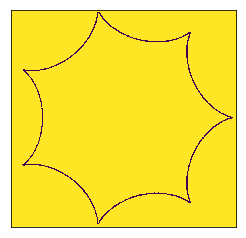

In [241]:
(thresh, blackAndWhiteImage) = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(blackAndWhiteImage)
plt.xticks([]), plt.yticks([]) 
plt.show()


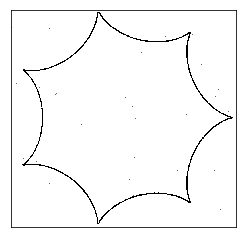

In [242]:
new_img = cv2.imread('result.png')
plt.imshow(new_img)
plt.xticks([]), plt.yticks([]) 
plt.show()

In [243]:
d = 0
azul = 0
for i in range(1, height-1):
    for j in range(1, width-1):
        dentro = False
        dentro_cima = True
        if np.array_equal(new_img[i,j], [100,100,100]) == True:
            ponto = (i,j)
            azul +=1
            dentro = baixo(ponto, i, j,dentro)
            dentro_cima = cima(ponto, i, j,dentro, dentro_cima)
            d = lado(ponto, i, j,dentro_cima,d)
            

                        
cv2.imwrite("result2.png",img_colorida)
                    
print(d, azul)

            
        

298 575


In [233]:
def baixo(ponto, i, j,dentro):
    for k in range(i, height-1):   
        if dentro == False:
            if np.array_equal(new_img[k,j], [100,100,100]) or np.array_equal(new_img[k,j], [255,255,255]):
                img_colorida[k,j]= [255,0,0]
                dentro = False
            else:
                dentro = True          
    return dentro

def cima(ponto, i, j,dentro, dentro_cima):
    for k in reversed(range(0, i+1)):
        if dentro == True:
            if np.array_equal(new_img[k,j], [100,100,100]) == True or np.array_equal(new_img[k,j], [255,255,255]) == True:
                img_colorida[k,j]=[0,0,255]
                dentro = True
                dentro_cima = True
            else:
                dentro = False
                dentro_cima = False
    return dentro_cima

def lado(ponto, i, j,dentro_cima,d):
    for k in range(j, height):
        if dentro_cima == False:
            if np.array_equal(new_img[i,k], [100,100,100])  or np.array_equal(new_img[i,k], [255,255,255]):
                img_colorida[i,k]=[0,150,0]
                dentro_cima = False
            else:
                d +=1
                dentro_cima = True
    return d
        
    

        
    

    
    

In [204]:
new_img[ponto]

array([100, 100, 100], dtype=uint8)